## Read Me
**Author**: Chong Zan Kai

**Email**: zkchong@gmail.com, zankai.chong@ada-asia.com

**Date**: 15-July-2018

**Description**: This notebook demonstrates a simple transfer learning technique, named Easy Adaptation from Daumé III, H. (2009).

Daumé III, H. (2009). Frustratingly easy domain adaptation. arXiv preprint arXiv:0907.1815.(https://arxiv.org/abs/0907.1815)

In [1]:
#
# Import the necessary libraries
#
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification


In [2]:
np.random.seed(42)

In [3]:
#
# Create the artificial sample.
#
X, y = make_classification(n_samples = 200, 
                           n_features = 3, 
                           n_redundant = 0, 
                           n_informative = 2,
                           n_clusters_per_class = 1, 
                           n_classes = 3)

# Converet to dataframe
X_df = pd.DataFrame(X, columns = ['x%d' % x for x in range( X.shape[1])] )
y_df = pd.DataFrame(y, columns = ['y'] )

<IPython.core.display.Javascript object>


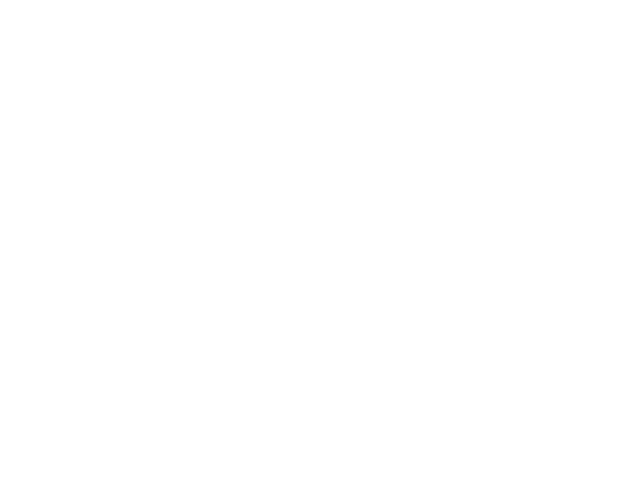

In [4]:
# Visualize in graph
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_df[(y_df.y == 0)]['x0'], 
           X_df[(y_df.y == 0)]['x1'], 
           X_df[(y_df.y == 0)]['x2'], 
           marker='o', c = 'blue' , s=25, edgecolor='k', label ='Class 0' )

ax.scatter(X_df[(y_df.y == 1)]['x0'], 
           X_df[(y_df.y == 1)]['x1'], 
           X_df[(y_df.y == 1)]['x2'], 
           marker='^', c = 'red' , s=25, edgecolor='k', label ='Class 1' )

ax.scatter(X_df[(y_df.y == 2)]['x0'], 
           X_df[(y_df.y == 2)]['x1'], 
           X_df[(y_df.y == 2)]['x2'], 
           marker='s', c = 'green' , s=25, edgecolor='k', label ='Class 2' )


ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

plt.legend()
plt.show()


## Separate for source and target domains

In [5]:
# Split to source and target domains
X_src_df, X_tgt_df, y_src_df, y_tgt_df = train_test_split(X_df, y_df, test_size=0.2)

# Make the target domain a slightly different.
column = 0
mu = 5
sigma = 0.5
nrow = X_tgt_df.shape[0]
c_noise = X_tgt_df.iloc[:, column] + np.random.normal(mu, sigma, nrow) 
X_tgt_df.iloc[:, column] = c_noise

column = 1
mu = 8
sigma = 1
nrow = X_tgt_df.shape[0]
c_noise = X_tgt_df.iloc[:, column] + np.random.normal(mu, sigma, nrow) 
X_tgt_df.iloc[:, column] = c_noise

# Split to train and test samples
X_src_train_df, X_src_test_df, y_src_train_df, y_src_test_df = train_test_split(X_src_df, y_src_df, test_size=0.2)
X_tgt_train_df, X_tgt_test_df, y_tgt_train_df, y_tgt_test_df = train_test_split(X_tgt_df, y_tgt_df, test_size=0.7)

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


<IPython.core.display.Javascript object>


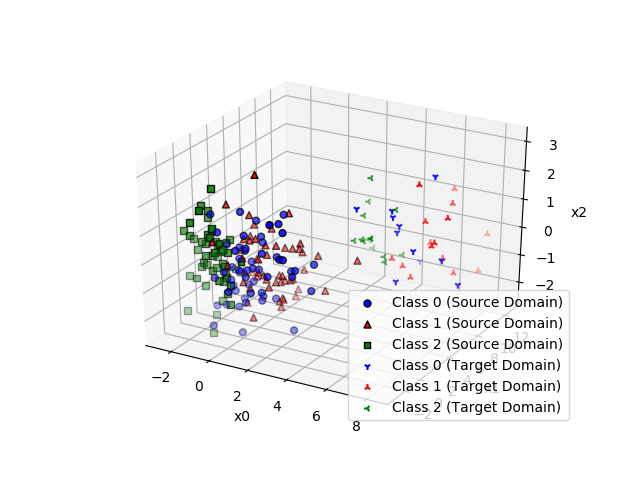

In [6]:
# Visualize in graph
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize source domain
X = X_src_df
y = y_src_df
ax.scatter(X[(y.y == 0)]['x0'], 
           X[(y.y == 0)]['x1'], 
           X[(y.y == 0)]['x2'], 
           marker='o', c = 'blue' , s=25, edgecolor='k', label ='Class 0 (Source Domain)' )

ax.scatter(X[(y.y == 1)]['x0'], 
           X[(y.y == 1)]['x1'], 
           X[(y.y == 1)]['x2'], 
           marker='^', c = 'red' , s=25, edgecolor='k', label ='Class 1 (Source Domain)' )

ax.scatter(X[(y.y == 2)]['x0'], 
           X[(y.y == 2)]['x1'], 
           X[(y.y == 2)]['x2'], 
           marker='s', c = 'green' , s=25, edgecolor='k', label ='Class 2 (Source Domain)' )


# Visualize target domain
X = X_tgt_df
y = y_tgt_df
ax.scatter(X[(y.y == 0)]['x0'], 
           X[(y.y == 0)]['x1'], 
           X[(y.y == 0)]['x2'], 
           marker='1', c = 'blue' , s=25, edgecolor='k', label ='Class 0 (Target Domain)' )

ax.scatter(X[(y.y == 1)]['x0'], 
           X[(y.y == 1)]['x1'], 
           X[(y.y == 1)]['x2'], 
           marker='2', c = 'red' , s=25, edgecolor='k', label ='Class 1 (Target Domain)' )
 
ax.scatter(X[(y.y == 2)]['x0'], 
           X[(y.y == 2)]['x1'], 
           X[(y.y == 2)]['x2'], 
           marker='3', c = 'green' , s=25, edgecolor='k', label ='Class 2 (Target Domain)' )


ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

plt.legend()
plt.show()


In [7]:
print ('len(X_src_df) = %d' % len(X_src_df))
print ('len(X_tgt_df) = %d' % len(X_tgt_df))
print()
print ('len(X_src_train_df) = %d' % len(X_src_train_df))
print ('len(X_src_test_df) = %d' % len(X_src_test_df))
print()
print ('len(X_tgt_train_df) = %d' % len(X_tgt_train_df))
print ('len(X_tgt_test_df) = %d' % len(X_tgt_test_df))


len(X_src_df) = 160
len(X_tgt_df) = 40

len(X_src_train_df) = 128
len(X_src_test_df) = 32

len(X_tgt_train_df) = 12
len(X_tgt_test_df) = 28


## Source-Only Model

In [8]:
# Create model
src_clf = SVC()

# Train
src_clf.fit(X_src_train_df, y_src_train_df)

# Evaluate
src_train_score = src_clf.score(X_src_train_df, y_src_train_df)
src_test_score = src_clf.score(X_tgt_test_df, y_tgt_test_df)

print('src_train_score = %0.4f' % src_train_score)
print('src_test_score = %0.4f' % src_test_score)



src_train_score = 0.8672
src_test_score = 0.2500


/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Target-Only Model

In [9]:
# Create model
tgt_clf = SVC()

# Train
tgt_clf.fit(X_tgt_train_df, y_tgt_train_df)

# Evaluate
tgt_train_score = tgt_clf.score(X_tgt_train_df, y_tgt_train_df)
tgt_test_score = tgt_clf.score(X_tgt_test_df, y_tgt_test_df)

print('tgt_train_score = %0.4f' % tgt_train_score)
print('tgt_test_score = %0.4f' % tgt_test_score)

tgt_train_score = 0.9167
tgt_test_score = 0.5357


/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Frustratingly Easy Domain Adaptation Model

In [10]:
#
# Prepare train _df
#
X1 =  pd.concat( [X_src_train_df.add_prefix('g_'), 
                 X_src_train_df.add_prefix('s_')], 
                 axis = 1)

X2 =  pd.concat( [X_tgt_train_df.add_prefix('g_'), 
                 X_tgt_train_df.add_prefix('t_')], 
                 axis = 1)

X_feda_train_df = pd.concat([X1, X2], axis=0, ignore_index=True).fillna(0)
y_feda_train_df = pd.concat([y_src_train_df, y_tgt_train_df], axis=0, ignore_index=True)
 
#
# Prepare test df
#
X3 = pd.DataFrame(columns = X_feda_train_df.columns)
X4 = pd.concat( [X_tgt_test_df.add_prefix('g_'), 
                 X_tgt_test_df.add_prefix('t_')], 
                 axis = 1)

X_feda_test_df = pd.concat([X3, X4], axis=0, ignore_index=True).fillna(0)
y_feda_test_df = y_tgt_test_df

#
# ML
#
# Model
feda_clf = SVC()

# Train
feda_clf.fit(X_feda_train_df, y_feda_train_df)

# Evaluate
feda_train_score = feda_clf.score(X_feda_train_df, y_feda_train_df)
feda_test_score = feda_clf.score(X_feda_test_df, y_feda_test_df)

print('feda_train_score = %0.4f' % feda_train_score)
print('feda_test_score = %0.4f' % feda_test_score)

feda_train_score = 0.8571
feda_test_score = 0.6071


/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Result

In [11]:
print ('len(X_src_df) = %d' % len(X_src_df))
print ('len(X_tgt_df) = %d' % len(X_tgt_df))
print()
print ('len(X_src_train_df) = %d' % len(X_src_train_df))
print ('len(X_src_test_df) = %d' % len(X_src_test_df))
print()
print ('len(X_tgt_train_df) = %d' % len(X_tgt_train_df))
print ('len(X_tgt_test_df) = %d' % len(X_tgt_test_df))

len(X_src_df) = 160
len(X_tgt_df) = 40

len(X_src_train_df) = 128
len(X_src_test_df) = 32

len(X_tgt_train_df) = 12
len(X_tgt_test_df) = 28


In [12]:
print('src_train_score = %0.4f' % src_train_score)
print('src_test_score = %0.4f' % src_test_score)
print()

print('tgt_train_score = %0.4f' % tgt_train_score)
print('tgt_test_score = %0.4f' % tgt_test_score)
print() 

print('feda_train_score = %0.4f' % feda_train_score)
print('feda_test_score = %0.4f' % feda_test_score)

src_train_score = 0.8672
src_test_score = 0.2500

tgt_train_score = 0.9167
tgt_test_score = 0.5357

feda_train_score = 0.8571
feda_test_score = 0.6071
